In [1]:
from pathlib import Path

path = Path('~/wine_analysis')
data_path = path/'wine-reviews'

In [2]:
import pandas as pd

wine_data = pd.read_csv(data_path/'winemag-data-130k-v2.csv')
clean_wine_data = wine_data[wine_data['price'].notna()]

In [22]:
clean_wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


There are probably a lot of interesting work I can do using NLP on the descriptions and titles, but for now I'm going to remove them to just create some quick and easy GLM's.

In [19]:
clean_wine_data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [3]:
test_vars = ['country', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name',
       'variety', 'winery']
model_data = clean_wine_data[test_vars]
model_data.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'variety', 'winery'],
      dtype='object')

In [4]:
X, y = model_data.drop('price', axis=1), model_data['price']

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# quick and dirty fix, although I bit silly
train_df = X_train
train_df['price'] = y_train
ols1 = smf.glm(formula="price ~ country", data=train_df, family=sm.families.Gaussian()).fit()
print(ols1.summary())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                96736
Model:                            GLM   Df Residuals:                    96694
Model Family:                Gaussian   Df Model:                           41
Link Function:               identity   Scale:                          1705.6
Method:                          IRLS   Log-Likelihood:            -4.9718e+05
Date:                Sun, 31 Mar 2019   Deviance:                   1.6492e+08
Time:                        14:27:23   Pearson chi2:                 1.65e+08
No. Iterations:                     3   Covariance Type:             nonrobust
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            24.3776      0.748     32.604      0.000      22

/usr/local/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1486: FutureWarning: Anscombe residuals currently unscaled. In a future release, they will be scaled.
  'release, they will be scaled.', category=FutureWarning)


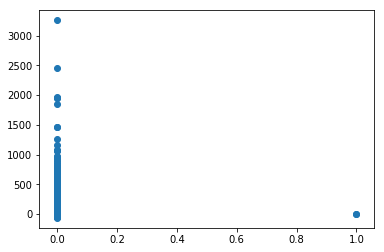

In [10]:
plt.scatter(ols1.model.exog[:,1], ols1.resid_anscombe)